# Logistic Regression

In [1]:
# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# visualisation
import matplotlib.pyplot as plt

In [2]:
# reading in data
filename = os.path.join("..","..","..","..", "cds-language", "data","fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

In [3]:
# checking data
data.sample(10)

,title,text,label
2532,"City, County Leaders Ask Court To Lift Injunct...",WASHINGTON -- Leaders from more than 70 cities...,REAL
4291,Trump says Cruz’s Canadian birth could be ‘ver...,Donald Trump said in an interview that rival T...,REAL
5475,U.S. calls for special Intermediate-range Nucl...,"Thu, 27 Oct 2016 15:29 UTC The United States h...",FAKE
7543,TRANSPARENCY! Report: Loretta Lynch won’t tell...,won’t Posted at 12:07 pm Doug P. \nSomeh...,FAKE
30,Abortion bill dropped amid concerns of female ...,This item has been updated.\n\nHouse Republica...,REAL
6389,Reinventing Democracy in America Starts by Vot...,Reinventing Democracy in America Starts by Vot...,FAKE
3903,"Obama Addresses Vaccinations, Other Issues In ...",President Barack Obama on Sunday encouraged pa...,REAL
10372,"Police Family Fakes Robbery, Vandalizes Own Ho...",Home / Badge Abuse / Police Family Fakes Robbe...,FAKE
10497,3 Charlotte Area Counties Report Voting Machin...,MecklenburgCatawba \nThe complaints noted that...,FAKE
9208,Hillary and Bill Clinton: The «Bonnie and Clyd...,Wayne MADSEN | 03.11.2016 | WORLD Hillary and ...,FAKE


In [4]:
# data variables containing text and labels
X = data["text"]
y = data["label"]

In [5]:
# creating a 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

In [6]:
# creating vectorizer object in order to turn text into a vector of number
vectorizer = TfidfVectorizer(ngram_range = (1,2),     # unigrams and bigrams
                             lowercase =  True,       # avoid word differentiation by capitalization 
                             max_df = 0.95,           # remove very common words
                             min_df = 0.05,           # remove very rare words
                             max_features = 100)      # keep top 100 features

In [7]:
# fit vector number to training data
X_train_feats = vectorizer.fit_transform(X_train)

# fit vector number to test data
X_test_feats = vectorizer.transform(X_test)

# get feature names
feature_names = vectorizer.get_feature_names_out()


In [8]:
# fit logistic regression classifier to training data
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

In [9]:
# test classifier on test data
y_pred = classifier.predict(X_test_feats)
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE'
 'REAL' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL']


In [10]:
# check which features the model regards as predicting fake or real news
clf.show_features(vectorizer, y_train, classifier, n = 20)

FAKE				REAL

-4.3803	by             		5.3471	republican     
-3.6202	us             		5.2193	said           
-2.7769	you            		3.7399	obama          
-2.6218	just           		3.4983	state          
-2.1811	this           		2.8368	who            
-1.8911	be             		2.7182	that           
-1.7431	to the         		2.6008	president      
-1.7128	that the       		2.3978	than           
-1.6080	with           		2.1384	campaign       
-1.5910	into           		2.1343	more           
-1.4974	been           		2.1314	party          
-1.3538	is             		2.1239	two            
-1.3343	was            		2.0176	on the         
-1.3270	which          		1.8099	states         
-1.1413	of             		1.7531	could          
-1.0842	now            		1.7189	most           
-1.0386	their          		1.6430	he             
-0.9210	they           		1.6219	in             
-0.8902	so             		1.5984	she            


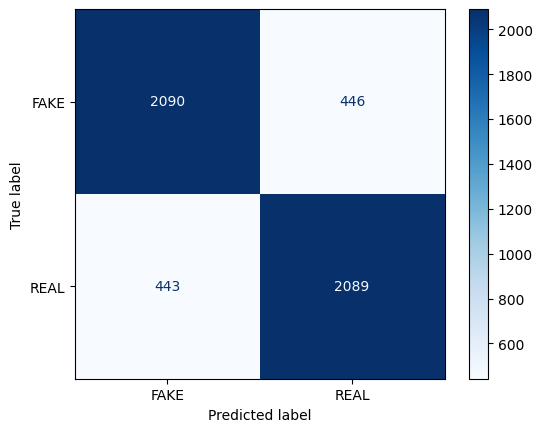

In [11]:
# evaluate model with confusion matrix
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

In [12]:
# calculating classification report
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.84      0.81      0.82       628
        REAL       0.82      0.85      0.83       639

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



In [17]:
# save model
from joblib import dump, load
dump(classifier, "../models/LR_classifier.joblib")
dump(vectorizer, "../models/tfidf_vectorizer.joblib")

['../models/tfidf_vectorizer.joblib']

In [13]:
# save classification report
f = open("../out/Classification_Report_LogReg.txt", "w")
f.write(classifier_metrics)
f.close()